# Import Library & Data

In [979]:
import pandas as pd
import numpy as np 
from datetime import date
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [899]:
data=pd.read_csv(r'C:\Users\cleme\Desktop\IronHack\Projet Final\autos_new.csv')  

In [900]:
data

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
1,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,2016-04-04,33775,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335106,2016-03-14,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,39576,2016-04-06
335107,2016-03-05,Smart_smart_leistungssteigerung_100ps,1199,convertible,2000,automatik,101,fortwo,125000,3,gasoline,smart,nein,2016-03-05,26135,2016-03-11
335108,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
335109,2016-03-20,VW_Golf_Kombi_1_9l_TDI,3400,station wagon,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,40764,2016-03-24


# Data Exploration &  Data Cleaning

In [901]:
data.dtypes

date_crawled          object
name                  object
dollar_price           int64
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
kilometer              int64
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
postal_code            int64
last_seen_online      object
dtype: object

In [902]:
#Checking data types, to catch potential columns needing to be converted
#First glance, i think my columns "ad_created" will need to be converted to a date format

In [903]:
#I'm also gonna drop "date_crawled" and "last_seen_online" because they offer no real insight
data=data.drop(['date_crawled','last_seen_online'], axis=1)

In [904]:
data['ad_created'] = data['ad_created'].map(pd.to_datetime)

In [905]:
#Next step will be looking for potential missing values and duplicated rows

In [906]:
data.isna().sum()

name                      0
dollar_price              0
vehicle_type          41732
registration_year         0
gearbox               13585
power_ps                  0
model                 15332
kilometer                 0
registration_month        0
fuel_type             24034
brand                     0
unrepaired_damage     55331
ad_created                0
postal_code               0
dtype: int64

In [907]:
#filling "unrepaired damage" 
data['unrepaired_damage'].fillna(data['unrepaired_damage'].mode()[0], inplace=True)

In [908]:
#checking results
data['unrepaired_damage'].isna().sum()

0

In [909]:
#filling "model"
#as 'model' will be the base of the filling of the other column it's important to fill the most missing values possible

In [910]:
#putting everything to lowercase to simplify the matching of the string
data['name'] = data['name'].str.lower()

In [911]:
#creating a lsit from the unique models in the column to be able to look for them individually
car_model=data['model'].unique().tolist()

In [912]:
#removing nan which was the first value and that made it impossibel to run my for loop
car_model.pop(0)

nan

In [913]:
#loop iterating through the dataframe looking for matchh on the previous 
#list and filling the missing values accordingly

for i in car_model:
    data.loc[data.name.str.contains(i, regex=True), 'model'] = 
    data.loc[data.name.str.contains(i, regex=True), 'model'].fillna(i)

In [914]:
#close to 10K missing values filled thanks to the function
data['model'].value_counts()

golf               28102
andere             24075
3er                19281
polo               11063
corsa              10171
                   ...  
rangerover             6
samara                 5
serie_3                3
serie_1                1
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [915]:
#filling "fuel_type"

In [916]:
#knowing that when "tdi" appears in the name of the ad it means that it is a diesel car, let's fill those missing value on this condition
data.loc[data.name.str.contains('tdi', regex=True), 'fuel_type'] = data.loc[data.name.str.contains('tdi', regex=True), 'fuel_type'].fillna('diesel')

In [917]:
#checking on row 0, which met the condition, if it worked
data.head(1)

,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code
0,a5_sportback_2.7_tdi,18300,coupé,2011,manuell,190,a5,125000,5,diesel,audi,ja,2016-03-24,66954


In [918]:
#to fill the remaining missing values I decided to go with the modal fuel type of the 'model' column

In [919]:
#we have 252 values in the 'model' column so we need to automate things as much as possible 
len(data.model.unique())

252

In [920]:
#which is why we are using a combinaison of groupby to get the model value by model and lambda to fill with said value
data['fuel_type']=data.groupby('model').fuel_type.transform(lambda x: x.fillna(x.mode()[0]))

In [921]:
#we now have the same number of missing values as in the model column
data['fuel_type'].isna().sum()

5435

In [922]:
#filling 'gearbox' column again thanks to a groupby based on model
data['gearbox']=data.groupby('model').gearbox.transform(lambda x: x.fillna(x.mode()[0]))

In [923]:
#we now have the same number of missing values as in the model column
data['gearbox'].isna().sum()

5435

In [924]:
#filling 'vehicle_type' column again thanks to a groupby based on model, but taking into account the number of missing values I'm gonna check every mode possible
data.groupby('model').vehicle_type.agg(pd.Series.mode).value_counts()

limousine                     68
small car                     53
station wagon                 38
bus                           36
convertible                   19
coupé                         15
other                          5
[bus, other]                   1
[bus, other, small car]        1
[]                             1
[bus, limousine]               1
[other, small car]             1
[]                             1
[]                             1
[]                             1
[convertible, coupé]           1
[limousine, station wagon]     1
[small car, station wagon]     1
[coupé, limousine]             1
[]                             1
[convertible, coupé]           1
[]                             1
[]                             1
[bus, other]                   1
Name: vehicle_type, dtype: int64

In [925]:
#First try at custom function
#data['vehicle_type']=data.groupby('model').gearbox.transform(lambda x: x.fillna(x.mode()[0]))
#The function that was working until then is giving me errors (like "0" For instance) that I'm not really understanding even if it has probably to do with the empty modes that we see above

In [926]:
#Second try at custom function
#df=pd.DataFrame()
#for i in x:

    #a=data.loc[data["model"]==i]
    #""" m=a['vehicle_type'].mode()
    #if type(m)=="str":"""
    #a['vehicle_type'].fillna(a['vehicle_type'].mode()[0], inplace=True)
    #df=df.append(a)

In [927]:
#Third time is the charm
x=data.model.unique()
for i in x:
    data.loc[data["model"]==i, 'vehicle_type'] = 
    data.loc[data["model"]==i, 'vehicle_type'].fillna(data['vehicle_type'].mode()[0])

In [928]:
data.isna().sum()

name                     0
dollar_price             0
vehicle_type          1956
registration_year        0
gearbox               5435
power_ps                 0
model                 5435
kilometer                0
registration_month       0
fuel_type             5435
brand                    0
unrepaired_damage        0
ad_created               0
postal_code              0
dtype: int64

In [929]:
#regarding the remaining missing values, i will be dropping all the row considering most of them have several missing data making it too hard to work with them
data_missing= data[data.isnull().sum(axis=1) >= 2 ]
data_missing

,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code
138,is_ales_ok,500,small car,1999,NaN,0,NaN,150000,0,NaN,renault,nein,2016-03-19,26969
280,biete_bmw_318_i_kombi_auch_tausch,1600,station wagon,1999,NaN,0,NaN,150000,6,NaN,bmw,nein,2016-03-13,41199
323,peugeot_107_klima,5500,small car,2012,NaN,68,NaN,40000,12,NaN,peugeot,nein,2016-03-08,24536
505,top_zustand,2600,NaN,2005,NaN,0,NaN,125000,0,NaN,chevrolet,nein,2016-03-15,94315
609,oldsmobile_cutlass,15000,coupé,1971,NaN,0,NaN,5000,4,NaN,sonstige_autos,nein,2016-03-30,51145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334740,sehr_gepflegter_renult_kombi_aus_1hand_und_neu...,1670,NaN,2016,NaN,0,NaN,90000,0,NaN,renault,nein,2016-04-07,12167
334750,mercedes_benz_407,1500,bus,1984,NaN,0,NaN,150000,5,NaN,mercedes_benz,nein,2016-03-15,48282
334775,hyundai_atos_prime_1.0,1000,NaN,2016,NaN,54,NaN,125000,2,NaN,hyundai,nein,2016-04-01,67547
334817,cadillac_cts_v_dt.modell_garantie_3/17_magnafl...,42000,limousine,2012,NaN,564,NaN,50000,3,NaN,sonstige_autos,nein,2016-03-05,49176


In [930]:
data.dropna(inplace=True)
data

,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code
0,a5_sportback_2.7_tdi,18300,coupé,2011,manuell,190,a5,125000,5,diesel,audi,ja,2016-03-24,66954
1,"jeep_grand_cherokee_""overland""",9800,limousine,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,90480
2,golf_4_1_4__3türer,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,2016-03-17,91074
3,skoda_fabia_1.4_tdi_pd_classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437
4,bmw_316i___e36_limousine___bastlerfahrzeug__ex...,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,2016-04-04,33775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335106,suche_t4___vito_ab_6_sitze,2200,limousine,2005,manuell,0,vito,20000,1,diesel,sonstige_autos,nein,2016-03-14,39576
335107,smart_smart_leistungssteigerung_100ps,1199,convertible,2000,automatik,101,fortwo,125000,3,gasoline,smart,nein,2016-03-05,26135
335108,volkswagen_multivan_t4_tdi_7dc_uy2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439
335109,vw_golf_kombi_1_9l_tdi,3400,station wagon,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein,2016-03-20,40764


In [931]:
data2.isna().sum()

ad_name               0
dollar_price          0
vehicle_type          0
registration_year     0
gearbox               0
horsepower            0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
unrepaired_damage     0
ad_creation_date      0
postal_code           0
dtype: int64

In [932]:
#now what is left is to rename columns
data=data.rename(columns={'power_ps': 'horsepower','ad_created':'ad_creation_date', 'name':'ad_name'})

# EDA

In [933]:
#now let's check non-numeric columns
data.columns

Index(['ad_name', 'dollar_price', 'vehicle_type', 'registration_year',
       'gearbox', 'horsepower', 'model', 'kilometer', 'registration_month',
       'fuel_type', 'brand', 'unrepaired_damage', 'ad_creation_date',
       'postal_code'],
      dtype='object')

In [934]:
data['vehicle_type'].value_counts()
#limousine can appear surprising but it's just the german way of saying berline(fr)/sedan(en)

limousine        128531
small car         67940
station wagon     62543
bus               28896
convertible       21902
coupé             17224
other              2640
Name: vehicle_type, dtype: int64

In [935]:
data['gearbox'].value_counts()
#no irregularities

manuell      255348
automatik     74328
Name: gearbox, dtype: int64

In [936]:
data['model'].value_counts()
#too huge a number to check this way

golf               28102
andere             24075
3er                19281
polo               11063
corsa              10171
                   ...  
rangerover             6
samara                 5
serie_3                3
serie_1                1
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [937]:
data['fuel_type'].value_counts()
#no irregularities, i will let other as it's plausible that those car could use an alternate means of combustion, like retrofitting for cooking oil for example

gasoline                   214762
diesel                     109341
liquefied petroleum gas      4928
compressed natural gas        533
other                         112
Name: fuel_type, dtype: int64

In [938]:
data['brand'].value_counts()
#no irregularities either

volkswagen        71355
bmw               36992
mercedes_benz     33755
opel              33615
audi              30990
ford              21368
renault           14944
peugeot            9531
fiat               8054
seat               6253
skoda              5434
smart              5010
mazda              4901
citroen            4584
toyota             4502
nissan             4394
hyundai            3367
mini               3327
volvo              3001
mitsubishi         2562
honda              2514
kia                2369
porsche            2094
alfa_romeo         2064
suzuki             2044
chevrolet          1730
chrysler           1283
sonstige_autos     1192
dacia               883
jeep                770
land_rover          754
subaru              649
daihatsu            597
jaguar              592
saab                482
daewoo              400
lancia              387
trabant             383
rover               348
lada                202
Name: brand, dtype: int64

In [939]:
data['unrepaired_damage'].value_counts()
#no irregularities either

nein    303553
ja       26123
Name: unrepaired_damage, dtype: int64

In [940]:
#replacing most of the german vocab
data['unrepaired_damage']=data['unrepaired_damage'].replace({'nein':'no','ja':'yes'})
data['vehicle_type']=data['vehicle_type'].replace({'limousine':'sedan'})
data['vehicle_type']=data['vehicle_type'].replace({'manuell':'manual','automatik':'automatic'})

In [941]:
#et's check numeric columns
data.describe()

,dollar_price,registration_year,horsepower,kilometer,registration_month,postal_code
count,329676.000000,329676.000000,329676.000000,329676.000000,329676.000000,329676.000000
mean,6272.858076,2003.786460,120.691352,125348.448173,5.943560,51291.179543
std,8428.162467,7.141631,187.763483,39449.181900,3.622808,25706.592797
min,500.000000,1945.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1500.000000,2000.000000,75.000000,100000.000000,3.000000,30974.000000
50%,3500.000000,2004.000000,110.000000,150000.000000,6.000000,50226.000000
75%,7940.000000,2008.000000,150.000000,150000.000000,9.000000,72144.000000
max,245000.000000,2016.000000,20000.000000,150000.000000,12.000000,99998.000000


In [942]:
#The minimum value for horsepower is obvisouly wrong, as well as the values for kilometers
#minimum value for registration needs to be check because of its status as a outlier, but is plausible

<AxesSubplot:>

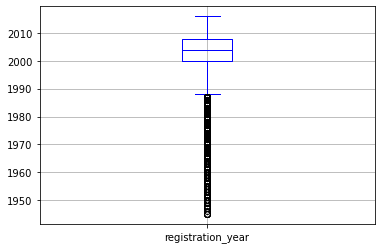

In [943]:
data.boxplot('registration_year', grid='true', color='blue')
#outside of the whiskers we can see several outliers, that represent older cars and seeing the distribution of those outliers the 1945 minimum value looks justified to me

<AxesSubplot:>

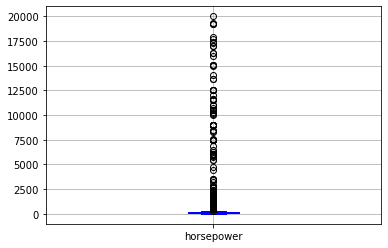

In [944]:
data.boxplot('horsepower', grid='true', color='blue')
#Concerning number of outliers/inconsistencies here

In [945]:
#to be reasonable and inline with characteristics of german sport cars I decided to limit my dataset to 750 horsepower
data=data[data['horsepower'] < 750]

In [946]:
#visually checking the outliers on the lower end
data[data['horsepower'] < 40]

,ad_name,dollar_price,vehicle_type,registration_year,gearbox,horsepower,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_creation_date,postal_code
30,renault_kangoo_1.9_diesel,1500,sedan,2016,manuell,0,kangoo,150000,1,diesel,renault,no,2016-03-28,46483
46,opel_signum_1.9_cdti,4700,station wagon,2005,manuell,0,signum,150000,0,diesel,opel,no,2016-03-17,88433
47,auto_opel_astra,550,station wagon,1999,manuell,0,astra,150000,8,diesel,opel,yes,2016-03-26,56759
60,opel_astra_g_coupe_1.8_liter_benziner,1200,coupé,2001,manuell,0,astra,150000,0,gasoline,opel,no,2016-04-01,47249
61,volkswagen_polo,800,small car,1993,manuell,0,polo,150000,3,gasoline,volkswagen,no,2016-03-08,8258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335078,top_zustand,3299,sedan,2005,automatik,0,outlander,150000,4,gasoline,mitsubishi,no,2016-03-05,17034
335088,220_cdi_benz,2600,sedan,2005,automatik,0,c_klasse,150000,9,gasoline,mercedes_benz,no,2016-03-07,61169
335102,bmw_320_d_dpf_touring_!!!,3999,station wagon,2005,manuell,3,3er,150000,5,diesel,bmw,no,2016-04-02,81825
335105,opel_zafira_1.6_elegance_tüv_12/16,1150,bus,2000,manuell,0,zafira,150000,3,gasoline,opel,no,2016-03-27,26624


In [947]:
#after confirming they were inconsistencies/missing data disguised as outliers i decided to replace them with median value of horsepower
data.loc[data['horsepower'] <40, 'horsepower'] = data.loc[data['horsepower']>40, 'horsepower'].median()

<AxesSubplot:>

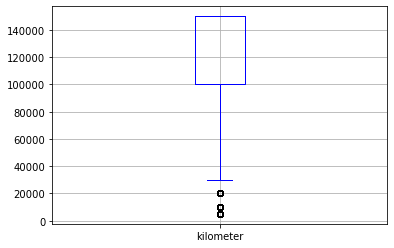

In [948]:
data.boxplot('kilometer', grid='true', color='blue')
#the outliers on the low side are over 5000 so they are plausible but I actually don't know how to interpret this sort of hardcap at 1500000 kilometers (maybe it was a limit of the Ebay menu)

In [1074]:
#exporting clean_data pour potentiel visualisation dans Tableau
data.to_csv(r'C:\Users\cleme\Desktop\IronHack\Projet Final\clean_data.csv', index=False)

In [950]:
#Encoding data to check for correlation

In [951]:
data_encoded=data.copy()
data_encoded

,ad_name,dollar_price,vehicle_type,registration_year,gearbox,horsepower,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_creation_date,postal_code
0,a5_sportback_2.7_tdi,18300,coupé,2011,manuell,190,a5,125000,5,diesel,audi,yes,2016-03-24,66954
1,"jeep_grand_cherokee_""overland""",9800,sedan,2004,automatik,163,grand,125000,8,diesel,jeep,no,2016-03-14,90480
2,golf_4_1_4__3türer,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17,91074
3,skoda_fabia_1.4_tdi_pd_classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437
4,bmw_316i___e36_limousine___bastlerfahrzeug__ex...,650,sedan,1995,manuell,102,3er,150000,10,gasoline,bmw,yes,2016-04-04,33775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335106,suche_t4___vito_ab_6_sitze,2200,sedan,2005,manuell,116,vito,20000,1,diesel,sonstige_autos,no,2016-03-14,39576
335107,smart_smart_leistungssteigerung_100ps,1199,convertible,2000,automatik,101,fortwo,125000,3,gasoline,smart,no,2016-03-05,26135
335108,volkswagen_multivan_t4_tdi_7dc_uy2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,no,2016-03-19,87439
335109,vw_golf_kombi_1_9l_tdi,3400,station wagon,2002,manuell,100,golf,150000,6,diesel,volkswagen,no,2016-03-20,40764


In [952]:
# list of column names to be encoded
columns_to_be_encoded = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'unrepaired_damage']

# Instantiate the encoders
encoders = {column: LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    data_encoded[column] = encoders[column].fit_transform(data_encoded[column])

In [953]:
encoders

{'vehicle_type': LabelEncoder(),
 'gearbox': LabelEncoder(),
 'model': LabelEncoder(),
 'fuel_type': LabelEncoder(),
 'brand': LabelEncoder(),
 'unrepaired_damage': LabelEncoder()}

In [954]:
corr = data_encoded.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,dollar_price,vehicle_type,registration_year,gearbox,horsepower,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,postal_code
dollar_price,1.000000,-0.154201,0.297375,-0.282927,0.551711,-0.009883,-0.417920,0.040279,-0.181004,-0.102365,-0.121776,0.072459
vehicle_type,-0.154201,1.000000,0.032877,0.008081,-0.112775,-0.127940,0.053689,0.011570,0.009706,-0.042812,0.013818,-0.020676
registration_year,0.297375,0.032877,1.000000,-0.069610,0.127037,0.065344,-0.272835,0.027287,-0.233331,-0.022378,-0.068767,0.024620
gearbox,-0.282927,0.008081,-0.069610,1.000000,-0.434449,0.042323,0.039298,-0.036463,0.128391,0.125365,0.014872,0.025119
horsepower,0.551711,-0.112775,0.127037,-0.434449,1.000000,-0.124886,-0.020023,0.033246,-0.125978,-0.298992,-0.031943,0.060560
model,-0.009883,-0.127940,0.065344,0.042323,-0.124886,1.000000,-0.023064,-0.003403,-0.061549,0.474408,-0.007237,-0.043997
kilometer,-0.417920,0.053689,-0.272835,0.039298,-0.020023,-0.023064,1.000000,-0.010279,-0.097990,-0.026253,0.074510,-0.030728
registration_month,0.040279,0.011570,0.027287,-0.036463,0.033246,-0.003403,-0.010279,1.000000,-0.056702,-0.014513,-0.020620,0.006933
fuel_type,-0.181004,0.009706,-0.233331,0.128391,-0.125978,-0.061549,-0.097990,-0.056702,1.000000,0.027158,0.015423,-0.016595
brand,-0.102365,-0.042812,-0.022378,0.125365,-0.298992,0.474408,-0.026253,-0.014513,0.027158,1.000000,-0.006666,-0.070359


In [955]:
#no over-correlated columns, we can proceed forward